In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
hidden_layer = Dense(128, activation = 'relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_layer)
hidden_layer2 = Dense(128,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_layer2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#aading callback functions
# Save the best model during training
ModelCheckpoint(filepath='best_autoencoder.keras', save_best_only=True, monitor='val_loss', mode='min'),

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.6925 - val_loss: 0.6924


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


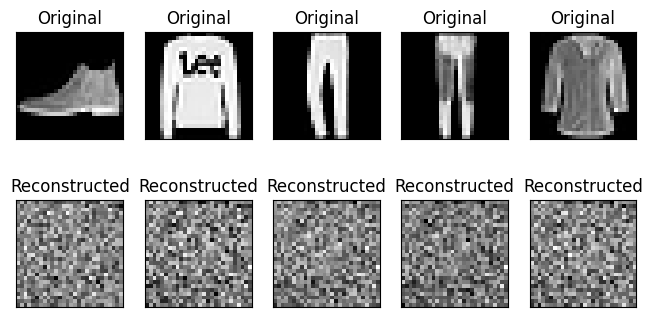

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 6.2552e-04 - loss: 0.6935 - val_accuracy: 5.0000e-04 - val_loss: 0.6934
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 7.4781e-04 - loss: 0.6933 - val_accuracy: 5.0000e-04 - val_loss: 0.6932
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 8.6379e-04 - loss: 0.6932 - val_accuracy: 5.0000e-04 - val_loss: 0.6931
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 7.1311e-04 - loss: 0.6930 - val_accuracy: 5.0000e-04 - val_loss: 0.6929
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 6.8843e-04 - loss: 0.6929 - val_accuracy: 5.0000e-04 - val_loss: 0.6928


In [24]:
import matplotlib.pyplot as plt

# Predict the reconstructed test data
decoded_imgs = autoencoder.predict(x_test)

# Number of images to visualize
n = 5

# Visualize the original and reconstructed images
plt.figure(figsize=(8, 4))

for i in range(n):
    # Display original test data (before reconstruction)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))  # reshape to 28x28 as that's the original image shape
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed test data (after reconstruction)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  # reshape to 28x28
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


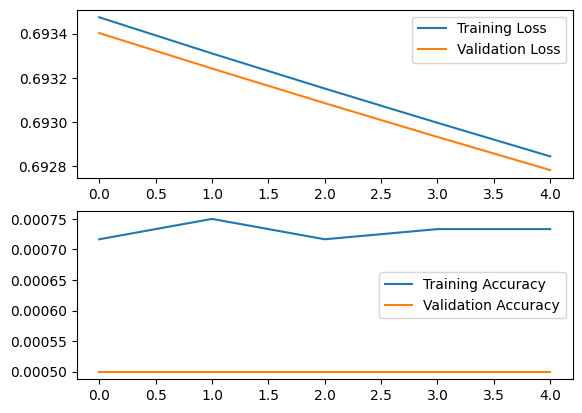

In [25]:
# Plot the loss and accuracy over epochs
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()

In [18]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


from keras.datasets import fashion_mnist
import numpy as np


(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history1 = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 7.8582e-04 - loss: 0.6981 - val_accuracy: 0.0012 - val_loss: 0.6980
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 6.9119e-04 - loss: 0.6978 - val_accuracy: 0.0013 - val_loss: 0.6977
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 9.6560e-04 - loss: 0.6975 - val_accuracy: 0.0013 - val_loss: 0.6974
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 6.6947e-04 - loss: 0.6972 - val_accuracy: 0.0014 - val_loss: 0.6971
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 8.8351e-04 - loss: 0.6969 - val_accuracy: 0.0014 - val_loss: 0.6968
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.0010 - loss: 0.6967 - val_accuracy: 0.0014 - val_loss: 0.6966
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 8.6178e-04 - loss: 0.6964 - val_accuracy: 0.0015 - val_loss: 0.6963
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 9.9367e-

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


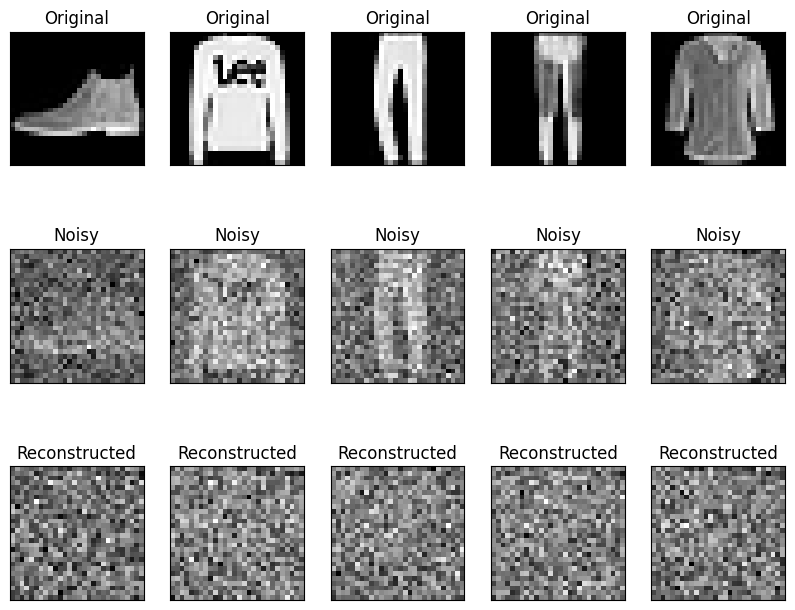

In [33]:
import matplotlib.pyplot as plt

# Get the reconstructed images
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Select one image to display
n = 5
plt.figure(figsize=(10, 8))

for i in range(n):
    # Display original test data (before reconstruction)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))  # reshape to 28x28 as that's the original image shape
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # noisy image
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # Display reconstructed test data (after reconstruction)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))  # reshape to 28x28
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

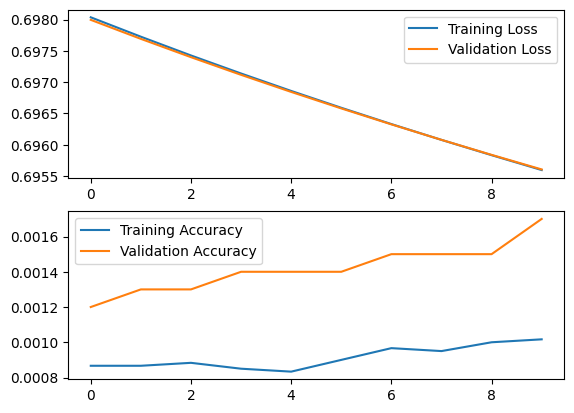

In [28]:
# Plot the loss and accuracy over epochs
plt.subplot(2, 1, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()